**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### Business Understanding

We have a business challenge to discover what influences the price of used cars. We'll apply CRISP-DM and several Machine Learning techniques to achieve this goal!

### problem statement 

As a used car dealer, staying on top of the constantly changing market value of your cars is an essential part of running a successful business. To remain competitive in this space, predicting the true worthof each vehicle based on its attributes can be critical to accurate pricing and increased customer interest. Developing a predictive model that considers factors such as make, model year, mileage and condition could help ensure you get more bang for your buck when setting prices and attract new customers.

Several machine learning models can be used to predict the value of a user's car. The choice of model depends on several factors, including the size and quality of the available data, the complexity of the problem, and the desired level of accuracy. Some of the commonly used models for car value prediction include:

1.	Linear regression: This simple model fits a linear equation to the data to predict the car's value. It works well with a linear relationship between the input features and the output value.
2.	Random Forest: This is a powerful model that can handle both categorical and continuous features. It works well when there are many input features, and the relationship between them and the output value is complex.
3.	Gradient Boosting: This model uses an ensemble of weak learners to make predictions. It works well when there are many input features, and the relationship between them and the output value is complex.
4.	Neural Networks: This powerful model can handle complex relationships between the input features and the output value. It works well when a large amount of data is available, and the relationship between the input features and the output value is non-linear.

It is important to note that the model's accuracy depends on the quality and quantity of the data used for training. Therefore, having a large, diverse, and high-quality dataset is essential to train the model for accurate predictions.


The business problem could involve addressing the following questions:

1. How can we develop a predictive model that accurately estimates the value of a used car based on its attributes?
2. Which features are the most important in determining the value of a used car?
3. How can we validate the accuracy of the predictive model?
4. How can we use the predictive model to set competitive prices for our used cars?
5. How can we update the predictive model to reflect changes in the market and in the availability of data?

By addressing these questions, the used car dealer could develop a data-driven approach to pricing their used cars that takes into account the unique features of each car and the current market conditions. This could lead to increased customer satisfaction, increased sales, and improved profitability for the dealership.





We are exploring two innovative approaches to predicting the value of used cars from a dataset containing three million entries. The first method is linear regression, an intuitive machine learning technique which draws meaningful insights from data using mathematical models and equations. Our second approach involves KMeans(), a powerful clustering algorithm provided by scikit-learn library in Python that organizes similar data points into clusters for unsupervised learning. By randomly selecting K centroids and iteratively assigning them until convergence is reached, we can gain valuable insight about how car attributes shape their market value!

In [2]:
import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Processing
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data/vehicles.csv


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:

UsedCar_data = pd.read_csv('data/vehicles.csv')


In [78]:

df=open('OutPut.txt','w')
nan_count = UsedCar_data.isna().sum()
df.write(nan_count.to_markdown())
df.close()


In [77]:
df=open('OutPut','w')
nan_count = UsedCar_data.isna().sum()
df.write(nan_count.to_string())
df.close()
print(nan_count)
UsedCar_data_r2 = UsedCar_data
# print(UsedCar_data.info())
# UsedCar_data_r2 = UsedCar_data.drop(['id','condition', 'cylinders','VIN','drive','size','paint_color','manufacturer','title_status'], axis=1)
# UsedCar_data_r2 = UsedCar_data.drop(['id','condition', 'cylinders','VIN','drive','size','paint_color','manufacturer','title_status'], axis=1)
#UsedCar_data_r2.info()
#print(UsedCar_data_r2['type'].unique())

s = UsedCar_data['condition'].unique()
mymap = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5}

mapping = {item:i for i, item in enumerate(UsedCar_data_r2["condition"].unique())}
UsedCar_data_r2["condition_code"] = UsedCar_data_r2["condition"].apply(lambda x: mapping[x])
print(UsedCar_data_r2.head())
print(s)
# xx = pd.get_dummies(data = UsedCar_data_r2, columns= ['type'])
# xx=xx.dropna(thresh=2)
# xx=xx.dropna(how='all')
# nan_count = xx.isna().sum()
# print(nan_count)
# xx.head()
# print(UsedCar_data_r2['fuel'].unique())
# print(UsedCar_data_r2['model'].unique())
# # nan_count = UsedCar_data.isna().sum()
# print(nan_count)
# print(UsedCar_data.head())
# #print(UsedCar_data.describe())

id                     0
region                 0
price                  0
year                1205
manufacturer       17646
model               5277
condition         174104
cylinders         177678
fuel                3013
odometer            4400
title_status        8242
transmission        2556
VIN               161042
drive             130567
size              306361
type               92858
paint_color       130203
state                  0
condition_code         0
dtype: int64
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
UsedCar_data_r2.ffill(axis = 0)
sns.scatterplot(UsedCar_data_r2)

plt.show()

C:\Users\Gaming Pc\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

C:\Users\Gaming Pc\AppData\Local\Temp\ipykernel_37540\3913538018.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = UsedCar_data_r2.corr()


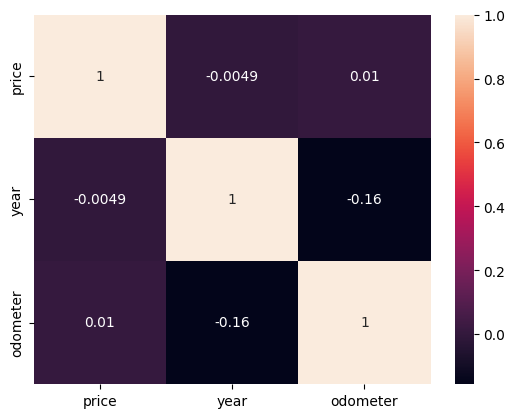

In [ ]:
corr_matrix = UsedCar_data_r2.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.